In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')

In [3]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


In [4]:
df=df.set_index('date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [5]:
df.index=pd.to_datetime(df.index)

In [6]:
df=df[(df['value']>=df['value'].quantile(0.025))
      &(df['value']<=df['value'].quantile(0.975))]

In [7]:
df.describe()

,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


In [8]:
# rename={'date': 'Date',
#        'value': 'Page Views'}
# df_new.rename(columns = rename, inplace=True)

In [9]:
# fig, ax = plt.subplots(figsize=(10,5))
# ax.plot(df.date,df.value, data=df)

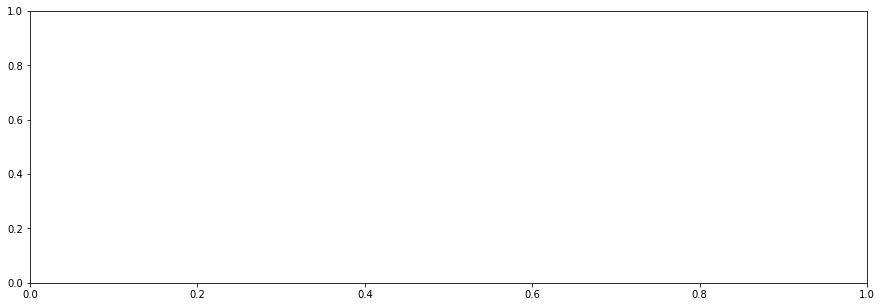

In [10]:
fig, ax = plt.subplots()
# fig=plt(figure=(10,5))
fig.set_size_inches(15, 5, forward=True)

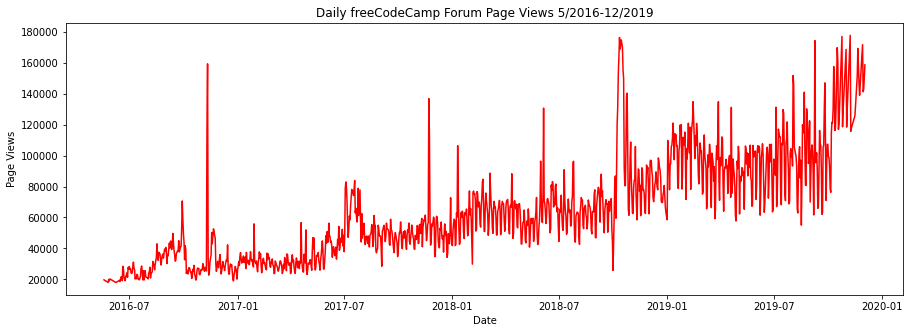

In [11]:
fig, ax = plt.subplots()
plt.plot(df.index,df.value,'r')
# plt.xticks(df_new.Date[::150], rotation=90)
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel('Date')
plt.ylabel('Page Views')
fig.set_size_inches(15, 5, forward=True)

<AxesSubplot:xlabel='date', ylabel='value'>

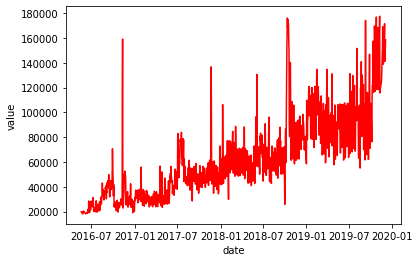

In [12]:
sns.lineplot(x='date',y='value', color='r', data=df)
#              title="Daily freeCodeCamp Forum Page Views 5/2016-12/2019" ,
#              ylabel='Page Views',
                 

# barplot 

In [13]:
dfcp=df.copy()
dfcp.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [14]:
# plt.bar("date",'value',data= dfcp ,align='center')
# plt.xticks(rotation=45)

In [15]:
# sns.set_theme(style="whitegrid")
# # tips = sns.load_dataset("tips")
# ax = sns.barplot("date",'value',data= df)

# #                     ['2016-7','2017-1','2017,7','2018-1','2018-7','2019-1','2019-7','2020-1']

# ax.set_xticks(np.arange(8)) 
# ax.set_xticklabels(['2016-7','2017-1','2017,7','2018-1','2018-7','2019-1','2019-7','2020-1'])

In [16]:
dfcp['year']=dfcp.index.year
dfcp['month']=dfcp.index.month
caterog = dfcp.groupby([df.index.year,
                        df.index.month],)['value'].agg(np.mean).rename_axis(['year','month'])
caterog = caterog.reset_index()
caterog.head()

,year,month,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667


In [17]:
df_pivot = pd.pivot_table(
caterog,
values='value',
index='year',
columns='month')
df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


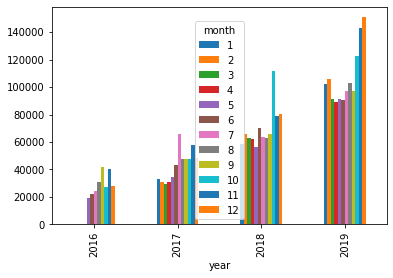

In [18]:
ax= df_pivot.plot(kind='bar')

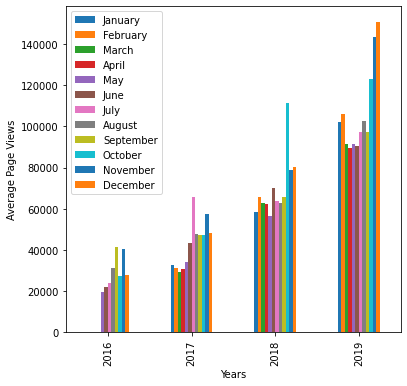

In [19]:
ax= df_pivot.plot(kind='bar')
fig =ax.get_figure()
fig.set_size_inches(6,6)
ax.set_xlabel("Years")
ax.set_ylabel("Average Page Views")
plt.legend(['January','February','March',
            'April','May','June','July',
            'August','September','October',
           'November','December'])

# box plot

In [20]:
# g=plt.boxplot("date",'value',data=df)
# g.xticks([0, 1, 2], ['January', 'February', 'March'],rotation=20)


In [21]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

In [50]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [ ]:
df_box.groupby()

<AxesSubplot:xlabel='year', ylabel='value'>

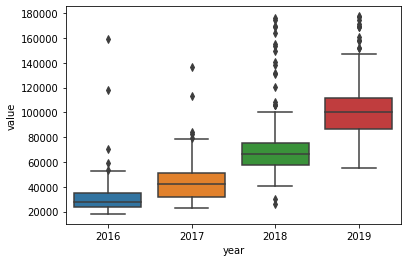

In [23]:
sns.boxplot(x='year',y='value', data=df_box)

<AxesSubplot:xlabel='month', ylabel='value'>

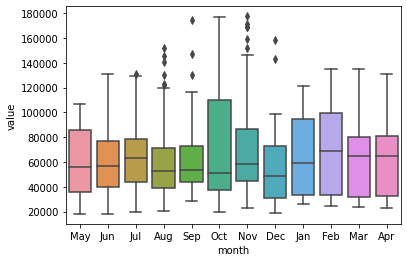

In [25]:
sns.boxplot(x='month',y='value', data=df_box)

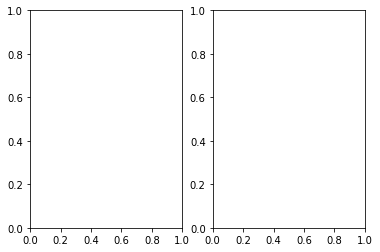

In [26]:
fig, axis=plt.subplots(1,2)

Text(0.5, 1.0, 'Your wise Box Plot(Seasonality)')

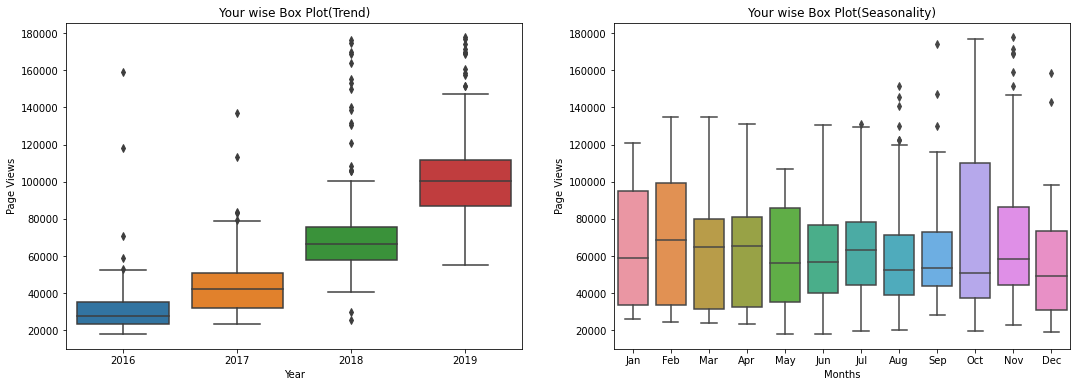

In [39]:
fig, axis=plt.subplots(1,2)
fig.set_size_inches(18,6)
sns.boxplot(x='year',y='value', data=df_box,ax=axis[0]).set(
    xlabel='Year', ylabel='Page Views')
sns.boxplot(x='month', y='value', data=df_box,
           order=(['Jan','Feb','Mar','Apr','May','Jun','Jul',
                   'Aug','Sep','Oct','Nov','Dec']),
           ax= axis[1]).set(xlabel='Months', ylabel='Page Views')
axis[0].set_title('Your wise Box Plot(Trend)')
axis[1].set_title('Your wise Box Plot(Seasonality)')